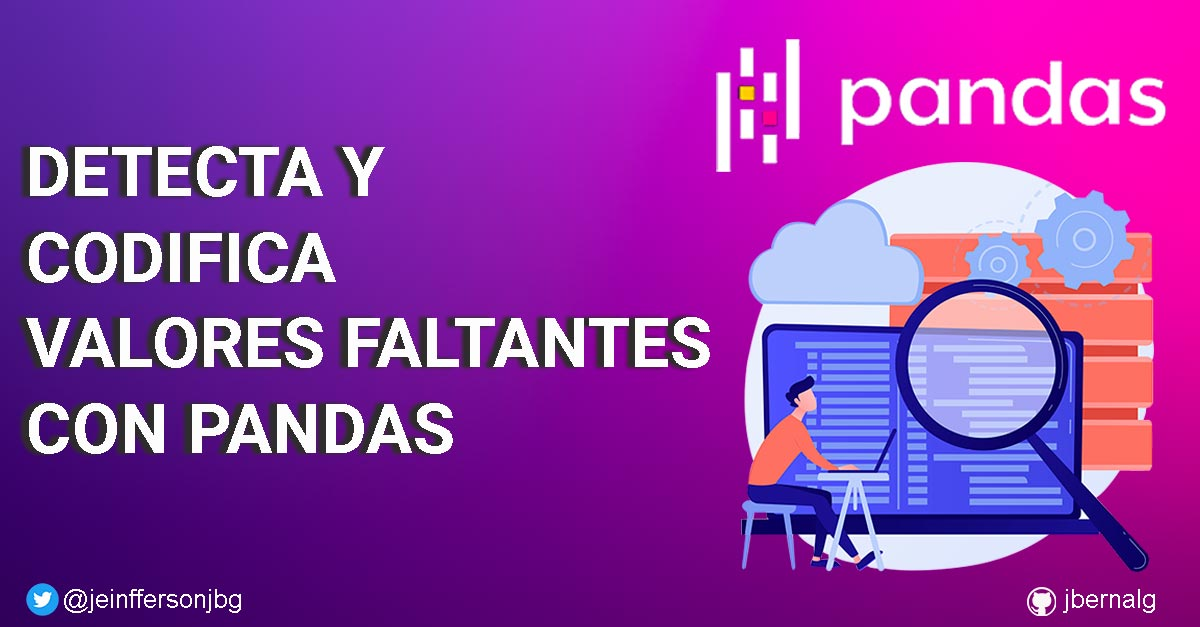

Asumir que los datos faltantes siempre vendrán en un único formato es un error. Debemos evaluar la data y determinar cómo vienen representados para luego codificarlos de manera que puedan ser interpretados por Pandas. 

## Librerias

In [16]:
# Librerias
import pandas as pd
import numpy as np

## Data de Prueba

Creamos un DataFrame a partir de la informacion contenida en un diccionario el cual posee tres variables: x,y,z

In [17]:
df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


## Valores Faltantes en la Data

El formato en el que vienen los datos faltantes no es reconocido por Pandas. Esto genera un problema de incosistencia por lo que debemos convertirlos a un formato que sea adecuado para Pandas. En lo que sigue te presentamos varios metodos para visualizar o contar los valores faltantes del DataFrame

### 1. Tabla de booleanos para detectar valores faltantes

In [26]:
df.isna()

,x,y,z
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False


La tabla anterior muestra el valor booleano False para cada dato. Esto indica que el DataFrame posee valores completos lo cual sabemos que no es cierto.  

### 2. Cantidad de valores faltantes por variable

In [27]:
df.isna().sum()

x    0
y    0
z    0
dtype: int64

El resultado muestra que no hay valores faltantes en las variables.

### 3. Cantidad total de valores faltantes en el DataFrame

In [28]:
df.isna().sum().sum()

0

## Valores comúnmente asociados a Valores Faltantes

En cada recoleccion de datos los valores faltantes pueden ser representados de distintas formas. Esto tambien va a depender de qué tipos de datos se están recolectando y de quien los recolecta. Existen algunas representaciones generales que se utilizan en muchos casos y que te presento a continuacion en las siguientes tuplas 

### De tipo texto

In [18]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

### De tipo numérico

In [19]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

## Detección de Valores Faltantes

Consiste de ciertas técnicas para encontrar los valores faltantes dentro del DataFrame bien sea por el tipo de dato, analizando los valores únicos de las variables o revisando los valores únicos de variables de un determinado tipo. Pandas considera una variable de tipo object si encuentra diferentes tipos de datos en la misma. Esto debe tenerse presente la hora de detectar valores faltantes ya que hay valores de tipo texto utilizados para representarlos. 

### 1. Mediante el tipo de dato

Utilizamos el método dtypes para obtener el tipo de datos de cada variable. Si el tipo de datos no coincide con los datos de la variable podría indicar la presencia de valores faltantes.

In [21]:
df.dtypes

x    object
y    object
z     int64
dtype: object

En este caso, la columna x sólo tiene 1 string mientras que los demás valores son numéricos. A pesar de ello, Pandas reconoce toda la columna como object lo que sugiere la presencia de valores faltantes.

### 2. Revisando valores únicos en los datos

Se aplica a cada variable y consiste en utilizar el método unique() para mostrar los diferentes tipos de datos. En caso de encontrar diferentes datos podría indicar que la variable contiene valores faltantes. 

In [22]:
df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

Como vemos, en la variable x sólo hay un elemento de tipo string y los demás son numéricos. La presencia de un tipo de valor diferente al resto sugiere la presencia de valores faltantes en la variable x.


### 3. Revisando los valores únicos de las variables de un determinado tipo

Este método aplica sobre todo el DataFrame y consiste en seleccionar las variables de tipo object y regresar sus valores únicos para detectar datos que no concuerden con el resto. 

In [23]:
(
    df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

En este caso, se observa que en la variable x hay un valor de tipo texto y el resto son numéricos. Dicho valor podría representar un valor faltante. Mientras que en la variable 'y' no es tan fácil determinar los valores que hacen referencia a valores faltantes ya que todos son de tipo texto. Sin embargo, investigar un poco sobre el proceso de recolección de datos puede ayudarnos con esa tarea.

## Sustitución de Valores Faltantes

Una vez detectado los valores faltantes y conociendo los valores que los representan, se sustituyen por un valor adecuado para que sea detectado por Pandas. Es el último paso de la codificación y el que evitará analizar los datos de manera errónea.

### 1. Sustitución Global

Método utilizado cuando conoces los valores que representan los valores faltantes pero no la ubicación de los mismos. Se aplica a nivel global sobre el DataFrame y utiliza el método replace() al cual se le pasan como parámetros los valores que representan los valores faltantes y el valor por el cual se va a sustituir, en este caso np.nan. 

In [24]:
(
    df
    .replace(
        to_replace=common_na_strings+common_na_numbers,
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


En el ejemplo, le pasamos las dos tuplas con los valores de tipo texto y numéricos que se utilizan comúnmente para representar valores faltantes

### 2. Sustitución Dirigida

Es una técnica que se aplica cuando conocemos los valores que representan los valores faltantes y la ubicación de los mismos. Utiliza el método replace() y se le pasa como parámetro un diccionario con la variable donde se hará la sustitución y los respectivos valores a sustituir junto al valor de sustitución.

In [25]:
(
    df
    .replace(
        to_replace={
            'x':{
                -99:np.nan,
                'NA':np.nan
            }
        }
    )
)

,x,y,z
0,1.0,A,-100
1,3.0,N/A,-99
2,NaN,NA,-98
3,NaN,E,-101
4,-98.0,F,-1
5,NaN,G,-1


Para este ejemplo sustituimos los valores 'NA' y '-99' por NaN en la variable x.

## Pandas Detectando Valores Faltantes

Para probar como ahora Pandas detecta los valores faltantes procedemos como sigue:

In [29]:
# guardamos la sustitucion en el DataFrame
df = df.replace(
        to_replace=common_na_strings+common_na_numbers,
        value=np.nan
    )

df

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


In [30]:
# probamos con la tabla de boolenaos
df.isna()

,x,y,z
0,False,False,False
1,False,True,True
2,True,True,False
3,True,False,False
4,False,False,True
5,True,False,True


Como vemos, ya losesta detectando. Se evidencia con los valores de True en la Tabla

In [31]:
# cantidad de valores faltantes por variable
df.isna().sum()

x    3
y    2
z    3
dtype: int64

In [32]:
# cantidad de valores faltantes en el DataFrame
df.isna().sum().sum()

8